In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [15]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [17]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')
queries_pred = loadpkl('../features/queries_pred.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

In [19]:
df

,sid,plan_0_distance,plan_1_distance,plan_2_distance,plan_3_distance,plan_4_distance,plan_5_distance,plan_6_distance,plan_0_price,plan_1_price,...,plan_weekday_hour_target_2,plan_weekday_hour_target_3,plan_weekday_hour_target_4,plan_weekday_hour_target_5,plan_weekday_hour_target_6,plan_weekday_hour_target_7,plan_weekday_hour_target_8,plan_weekday_hour_target_9,plan_weekday_hour_target_10,plan_weekday_hour_target_11
0,1709112,32303,33678.0,33678.0,32099.0,30446.0,NaN,NaN,600,0.0,...,0.263546,0.043028,0.019920,0.116335,0.024701,0.136255,0.004382,0.132470,0.026494,0.015139
1,3327773,3427,3251.0,3251.0,3227.0,3227.0,NaN,NaN,300,0.0,...,0.307466,0.057466,0.022232,0.106963,0.023070,0.169883,0.004614,0.035654,0.027685,0.009228
2,3285959,36234,29545.0,29545.0,33295.0,NaN,NaN,NaN,1100,0.0,...,0.269429,0.051365,0.019668,0.121825,0.027497,0.143976,0.004392,0.119916,0.020241,0.014703
3,1616170,11450,9100.0,10870.0,10870.0,11722.0,NaN,NaN,400,0.0,...,0.270058,0.043186,0.023417,0.116507,0.028407,0.149520,0.004031,0.117850,0.027255,0.011324
4,351369,18495,19111.0,19111.0,17117.0,NaN,NaN,NaN,600,0.0,...,0.317831,0.065542,0.025542,0.109639,0.024096,0.175663,0.002892,0.033494,0.027952,0.007229
5,749203,32486,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,0.298910,0.068313,0.023733,0.052919,0.013149,0.210712,0.000962,0.067030,0.025016,0.008659
6,3005789,4935,4434.0,4434.0,4228.0,3711.0,NaN,NaN,300,0.0,...,0.284613,0.043003,0.025106,0.108128,0.021129,0.151380,0.002237,0.098683,0.026846,0.006711
7,1897386,22103,18601.0,18601.0,24067.0,19733.0,NaN,NaN,500,0.0,...,0.294872,0.056731,0.018590,0.119231,0.025321,0.149038,0.002244,0.092949,0.022756,0.009936
8,845203,12422,12548.0,12548.0,12542.0,8641.0,13657.0,NaN,400,0.0,...,0.294928,0.037681,0.023913,0.108696,0.026812,0.149275,0.002899,0.091787,0.023430,0.013285
9,536341,2162,2647.0,2176.0,2647.0,2176.0,NaN,NaN,200,0.0,...,0.317831,0.065542,0.025542,0.109639,0.024096,0.175663,0.002892,0.033494,0.027952,0.007229


In [15]:
sub_preds = np.zeros((df.shape[0],12))
sub_preds = pd.DataFrame(sub_preds)
sub_preds.columns = ['pred_queries{}'.format(c) for c in sub_preds.columns]
sub_preds['sid'] = df['sid'].values

In [16]:
sub_preds

,pred_queries0,pred_queries1,pred_queries2,pred_queries3,pred_queries4,pred_queries5,pred_queries6,pred_queries7,pred_queries8,pred_queries9,pred_queries10,pred_queries11,sid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1709112
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3327773
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3285959
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1616170
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351369
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749203
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3005789
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1897386
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,845203
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536341


/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


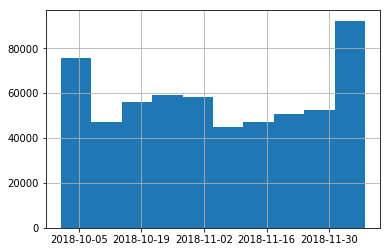

In [20]:
df.plan_time.sort_values().hist()